# Python Program To Identify The Genre Of Music Using KNN

## Imports

In [1]:
import librosa
import librosa.display as dsp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import signal
from scipy.io import wavfile

## Extracting Data From The Audio

In [2]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./Data/genres_original/{g}'):
        songname = f'./Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

## Loading And Preprocessing

In [3]:
data = pd.read_csv('data.csv')
data = data.drop(['filename'],axis=1)

In [4]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

## Training The Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

## Test set prediction and confusion matrix

In [8]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36  1 12  4  0  1  1  0  0  1]
 [ 0 64  1  0  1  1  0  0  0  0]
 [ 3  8 36  1  1  1  0  1  1  2]
 [ 1  1  8 27  4  0  2  8  0  7]
 [ 2  0  7 14 25  0  3  4  4  4]
 [ 4 15 20  4  0 22  0  3  0  4]
 [ 5  0  2  4  0  0 39  0  0  3]
 [ 0  0  2  6  3  0  0 43  2  1]
 [ 5  2  9  7  4  2  0  8 25  4]
 [ 2  1 18  8  1  1  1  2  1 19]]


0.56

## Testing On A Single Song

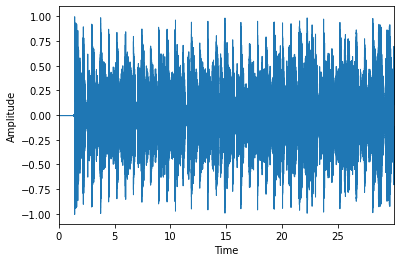

In [23]:
y, sr = librosa.load('test_pop.wav', mono=True, duration=30)
librosa.display.waveplot(y , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rmse = librosa.feature.rms(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_test = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]    
for e in mfcc:
    to_test.append(np.mean(e)) 
to_test = np.array(to_test)

In [15]:
sng_pred = classifier.predict(to_test.reshape(1, -1))
print(sng_pred)

[7]
